# PROJECT DATA WRANGLING & SQL

In [1]:
# import libraries
import sqlite3 as db
import pandas as pd

In [2]:
cnx = db.connect('/Users/hendriesaputra/Downloads/olist.db')
sql_query = """
  SELECT name FROM sqlite_master
  WHERE type='table';
"""
list_tables = pd.read_sql_query(sql_query,cnx)
list_tables

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


## Mengakses Dataset

In [3]:
# Define table
df_customer = pd.read_sql_query("""SELECT * FROM olist_order_customer_dataset""", cnx)
df_geolocation = pd.read_sql_query("""SELECT * FROM olist_geolocation_dataset""", cnx)
df_order_items = pd.read_sql_query("""SELECT * FROM olist_order_items_dataset""", cnx)
df_payments = pd.read_sql_query("""SELECT * FROM olist_order_payments_dataset""", cnx)
df_order_review = pd.read_sql_query("""SELECT * FROM olist_order_reviews_dataset""", cnx)
df_order = pd.read_sql_query("""SELECT * FROM olist_order_dataset""", cnx)
df_products = pd.read_sql_query("""SELECT * FROM olist_products_dataset""", cnx)
df_seller = pd.read_sql_query("""SELECT * FROM olist_sellers_dataset""", cnx)
df_category = pd.read_sql_query("""SELECT * FROM product_category_name_translation""", cnx)

In [4]:
# Menampilkan category
df_category

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor
...,...,...,...
66,66,flores,flowers
67,67,artes_e_artesanato,arts_and_craftmanship
68,68,fraldas_higiene,diapers_and_hygiene
69,69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Data Merging

In [5]:
# Merging order_id
# df_order_review, df_order, df_order_items, df_payments

# Merge df_order_review with df_order based on order_id
merged_order_id = pd.merge(df_order_review, df_order, on='order_id', how= 'inner')

# Merge df_order with df_order_items on order_id
merged_order_id = pd.merge(df_order, df_order_items, on='order_id', how= 'inner')

# Merge df_order_items with df_payments on order_id
merged_order_id = pd.merge(df_order_items, df_payments, on='order_id', how= 'inner')

In [6]:
# Menampilkan data null dari order_id
merged_order_id.isnull().sum()

index_x                 0
order_id                0
order_item_id           0
product_id              0
seller_id               0
shipping_limit_date     0
price                   0
freight_value           0
index_y                 0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [7]:
# Merging product_id
# df_products, df_order_items

# Merge df_products with df_order_items on product_id
merged_product_id = pd.merge(df_products, df_order_items, on='product_id', how = 'inner')

# Menampilkan data null dari product_id
merged_product_id.isnull().sum()

index_x                          0
product_id                       0
product_category_name         1603
product_name_lenght           1603
product_description_lenght    1603
product_photos_qty            1603
product_weight_g                18
product_length_cm               18
product_height_cm               18
product_width_cm                18
index_y                          0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [8]:
# Merging seller_id
# df_sellers, df_order_items

# Merge df_sellers with df_order_items on seller_id
merged_seller_id = pd.merge(df_seller, df_order_items, on='seller_id', how = 'inner')

# Menampilkan data null dari product_id
merged_seller_id.isnull().sum()

index_x                   0
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
index_y                   0
order_id                  0
order_item_id             0
product_id                0
shipping_limit_date       0
price                     0
freight_value             0
dtype: int64

In [27]:
# Merging zip_code_prefix
# df_seller, df_geolocation, df_customer

# Rename zip_code_prefix
df_seller.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'}, inplace=True)
df_geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'}, inplace=True)
df_customer.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

# Merge df_seller with df_geolocation on zip_code_prefix
merged_zip_code_prefix = pd.merge(df_seller, df_geolocation, on='zip_code_prefix', how = 'inner')

# Merge df_geolocation with df_customer on zip_code_prefix
merged_zip_code_prefix = pd.merge(df_geolocation, df_customer, on='zip_code_prefix', how = 'inner')


merged_zip_code_prefix.head()

,index_x,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,index_y,customer_id,customer_unique_id,customer_city,customer_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP,18484,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,sao paulo,SP
1,0,1037,-23.545621,-46.639292,sao paulo,SP,33270,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,sao paulo,SP
2,0,1037,-23.545621,-46.639292,sao paulo,SP,67898,6519f59a7687a4661f7c8a7e24f28f94,324ce23e08a1768007118a11836ea7d3,sao paulo,SP
3,14,1037,-23.545187,-46.637855,são paulo,SP,18484,05b005e82f3f2dcc41b5504f00484e50,3ef8c1513fc80fb905ccd8d57da5e9b8,sao paulo,SP
4,14,1037,-23.545187,-46.637855,são paulo,SP,33270,19ee522d0dd140702062bb89e4820e19,8e7b6c489f1fe794c0ca58c80868a24b,sao paulo,SP


# Handling Missing Value

### Handling Missing Value : order_id

In [9]:
# Check missing value (NaN)
def summary_table(merged_order_id): #function to create an added information regarding the dataset 
    summary = pd.DataFrame(dict(dataFeatures = merged_order_id.columns, 
                                dataType = merged_order_id.dtypes, #display datatype
                                null = merged_order_id.isna().sum(), #sum of null values
                                null_percentage = round(merged_order_id.isna().sum() / len(merged_order_id) *100,2),#how many percente null values 
                                unique = merged_order_id.nunique(), #cek for number of unique values
                                uniqueData = [list(merged_order_id[i].unique()) for i in merged_order_id.columns] #unique value 
                            ) 
                          ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(merged_order_id) *100,2) #convert unique to percentage values
    return summary 

In [10]:
summary_table(merged_order_id)

,dataFeatures,dataType,null,null_percentage,unique,uniqueData,unique_percentage
0,index_x,int64,0,0.0,112647,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",95.79
1,order_id,object,0,0.0,98665,"[00010242fe8c5a6d1ba2dd792cb16214, 00018f77f2f...",83.90
2,order_item_id,int64,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.02
3,product_id,object,0,0.0,32951,"[4244733e06e7ecb4970a6e2683c13e61, e5f2d52b802...",28.02
4,seller_id,object,0,0.0,3095,"[48436dade18ac8b2bce089ec2a041202, dd7ddc04e1b...",2.63
5,shipping_limit_date,object,0,0.0,93317,"[2017-09-19 09:45:35, 2017-05-03 11:05:13, 201...",79.35
6,price,float64,0,0.0,5968,"[58.9, 239.9, 199.0, 12.99, 199.9, 21.9, 19.9,...",5.07
7,freight_value,float64,0,0.0,6999,"[13.29, 19.93, 17.87, 12.79, 18.14, 12.69, 11....",5.95
8,index_y,int64,0,0.0,103056,"[85283, 2499, 12393, 32971, 98711, 50570, 3502...",87.63
9,payment_sequential,int64,0,0.0,29,"[1, 2, 5, 6, 4, 3, 7, 11, 10, 8, 9, 12, 13, 14...",0.02


### Handling Missing Value : product_id

In [16]:
# Check missing value (NaN)
def summary_table(merged_product_id): #function to create an added information regarding the dataset 
    summary = pd.DataFrame(dict(dataFeatures = merged_product_id.columns, 
                                dataType = merged_product_id.dtypes, #display datatype
                                null = merged_product_id.isna().sum(), #sum of null values
                                null_percentage = round(merged_product_id.isna().sum() / len(merged_product_id) *100,2),#how many percente null values 
                                unique = merged_product_id.nunique(), #cek for number of unique values
                                uniqueData = [list(merged_product_id[i].unique()) for i in merged_product_id.columns] #unique value 
                            ) 
                          ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(merged_product_id) *100,2) #convert unique to percentage values
    return summary 

In [12]:
summary_table(merged_product_id)

,dataFeatures,dataType,null,null_percentage,unique,uniqueData,unique_percentage
0,index_x,int64,0,0.00,32951,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",29.25
1,product_id,object,0,0.00,32951,"[1e9e8ef04dbcff4541ed26657ea517e5, 3aa071139cb...",29.25
2,product_category_name,object,1603,1.42,73,"[perfumaria, artes, esporte_lazer, bebes, util...",0.06
3,product_name_lenght,float64,1603,1.42,66,"[40.0, 44.0, 46.0, 27.0, 37.0, 60.0, 56.0, 57....",0.06
4,product_description_lenght,float64,1603,1.42,2960,"[287.0, 276.0, 250.0, 261.0, 402.0, 745.0, 127...",2.63
5,product_photos_qty,float64,1603,1.42,19,"[1.0, 4.0, 2.0, 3.0, 5.0, 9.0, 6.0, nan, 7.0, ...",0.02
6,product_weight_g,float64,18,0.02,2204,"[225.0, 1000.0, 154.0, 371.0, 625.0, 200.0, 18...",1.96
7,product_length_cm,float64,18,0.02,99,"[16.0, 30.0, 18.0, 26.0, 20.0, 38.0, 70.0, 40....",0.09
8,product_height_cm,float64,18,0.02,102,"[10.0, 18.0, 9.0, 4.0, 17.0, 5.0, 24.0, 8.0, 1...",0.09
9,product_width_cm,float64,18,0.02,95,"[14.0, 20.0, 15.0, 26.0, 13.0, 11.0, 44.0, 40....",0.08


### Handling Missing Value : seller_id

In [33]:
# Check missing value (NaN)
def summary_table(merged_seller_id): #function to create an added information regarding the dataset 
    summary = pd.DataFrame(dict(dataFeatures = merged_seller_id.columns, 
                                dataType = merged_seller_id.dtypes, #display datatype
                                null = merged_seller_id.isna().sum(), #sum of null values
                                null_percentage = round(merged_seller_id.isna().sum() / len(merged_seller_id) *100,2),#how many percente null values 
                                unique = merged_seller_id.nunique(), #cek for number of unique values
                                uniqueData = [list(merged_seller_id[i].unique()) for i in merged_seller_id.columns] #unique value 
                            ) 
                          ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(merged_seller_id) *100,2) #convert unique to percentage values
    return summary 

In [13]:
summary_table(merged_seller_id)

,dataFeatures,dataType,null,null_percentage,unique,uniqueData,unique_percentage
0,index_x,int64,0,0.0,3095,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2.75
1,seller_id,object,0,0.0,3095,"[3442f8959a84dea7ee197c632cb2df15, d1b65fc7deb...",2.75
2,seller_zip_code_prefix,int64,0,0.0,2246,"[13023, 13844, 20031, 4195, 12914, 20920, 5532...",1.99
3,seller_city,object,0,0.0,611,"[campinas, mogi guacu, rio de janeiro, sao pau...",0.54
4,seller_state,object,0,0.0,23,"[SP, RJ, PE, PR, GO, SC, BA, DF, RS, MG, RN, M...",0.02
5,index_y,int64,0,0.0,112650,"[32907, 48212, 83019, 1443, 2205, 3065, 10014,...",100.00
6,order_id,object,0,0.0,98666,"[4a90af3e85dd563884e2afeab1091394, 6d953888a91...",87.59
7,order_item_id,int64,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.02
8,product_id,object,0,0.0,32951,"[ffb64e34a37740dafb6c88f1abd1fa61, f4621f8ad6f...",29.25
9,shipping_limit_date,object,0,0.0,93318,"[2017-08-25 20:50:19, 2017-05-11 16:25:11, 201...",82.84


### Handling Missing Value : zip_code_prefix

In [18]:
# Check missing value (NaN)
def summary_table(merged_zip_code_prefix): #function to create an added information regarding the dataset 
    summary = pd.DataFrame(dict(dataFeatures = merged_zip_code_prefix.columns, 
                                dataType = merged_zip_code_prefix.dtypes, #display datatype
                                null = merged_zip_code_prefix.isna().sum(), #sum of null values
                                null_percentage = round(merged_zip_code_prefix.isna().sum() / len(merged_zip_code_prefix) *100,2),#how many percente null values 
                                unique = merged_zip_code_prefix.nunique(), #cek for number of unique values
                                uniqueData = [list(merged_zip_code_prefix[i].unique()) for i in merged_zip_code_prefix.columns] #unique value 
                            ) 
                          ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(merged_zip_code_prefix) *100,2) #convert unique to percentage values
    return summary 

In [28]:
summary_table(merged_zip_code_prefix)

,dataFeatures,dataType,null,null_percentage,unique,uniqueData,unique_percentage
0,index_x,int64,0,0.0,968299,"[0, 14, 31, 169, 178, 236, 283, 417, 420, 433,...",6.42
1,zip_code_prefix,int64,0,0.0,14837,"[1037, 1046, 1041, 1035, 1012, 1047, 1013, 101...",0.10
2,geolocation_lat,float64,0,0.0,691488,"[-23.54562128115268, -23.54518734081604, -23.5...",4.58
3,geolocation_lng,float64,0,0.0,691746,"[-46.63929204800168, -46.63785524104107, -46.6...",4.59
4,geolocation_city,object,0,0.0,5812,"[sao paulo, são paulo, sao bernardo do campo, ...",0.04
5,geolocation_state,object,0,0.0,27,"[SP, AC, RJ, ES, MG, BA, SE, PE, AL, PB, RN, C...",0.00
6,index_y,int64,0,0.0,99163,"[18484, 33270, 67898, 3300, 3516, 16525, 17875...",0.66
7,customer_id,object,0,0.0,99163,"[05b005e82f3f2dcc41b5504f00484e50, 19ee522d0dd...",0.66
8,customer_unique_id,object,0,0.0,95828,"[3ef8c1513fc80fb905ccd8d57da5e9b8, 8e7b6c489f1...",0.64
9,customer_city,object,0,0.0,4074,"[sao paulo, osasco, carapicuiba, barueri, sant...",0.03


### Kesimpulan

##### Bedasarkan hasil Handling Missing Value, terdapat NaN pada product_id. Diantaranya adalah : product_category_name, product_name_lenght, product description_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_lenght_cm, product_height_cm, product_width_cm

###### Saya melakukan drop pada semua kolom yang memiliki missing value pada kolom product_id dikarenakan tidak berdampak pada project analysis.

### Drop Product_id

In [32]:
merged_product_id.drop(columns = ['product_name_lenght',"product_description_lenght", "product_photos_qty", "product_weight_g","product_length_cm","product_height_cm", "product_width_cm"], inplace = True)


KeyError: "['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'] not found in axis"

In [34]:
# Check null after handling null
merged_product_id.isnull().sum()

index_x                     0
product_id                  0
product_category_name    1603
index_y                     0
order_id                    0
order_item_id               0
seller_id                   0
shipping_limit_date         0
price                       0
freight_value               0
dtype: int64

## HANDLING DUPLICATE

### Handling Duplicate pada order_id

In [35]:
merged_order_id.duplicated().sum()

0

### Handling Duplicate pada product_id

In [36]:
merged_product_id.duplicated().sum()

0

### Handling Duplicate pada seller_id

In [ ]:
merged_seller_id.duplicated().sum()

### Handling Duplicate pada zip_code_prefix

In [ ]:
merged_zip_code_prefix.duplicated().sum()

### Kesimpulan

##### Tidak terdapat duplicate data pada order_id, product_id, seller_id, dan zip_code_prefix

## CATEGORICAL COLUMN

### 1. Mencari category numerik dan karakter pada order_id

In [ ]:
merged_order_id.describe().T

In [37]:
numerical_cols_order_id = ['order_item_id','price','freight_value','payment_sequential','payment_installments','payment_value']

# ANALYSIS

## 1. Mencari total penjualan dari tiap kategori

In [21]:
# Menampilkan tabel order_id
merged_order_id.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,payment_sequential,payment_type,payment_installments,payment_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,85283,1,credit_card,2,72.19
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2499,1,credit_card,3,259.83
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,12393,1,credit_card,5,216.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,32971,1,credit_card,2,25.78
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,98711,1,credit_card,3,218.04


In [35]:
# Mencari banyaknya penjualan dari order_item_id
merged_product_id.sort_values(by='order_item_id',ascending=False)

,index_x,product_id,product_category_name,index_y,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
6659,1962,79ce45dbc2ea29b22b5a261bbb7b7ee7,beleza_saude,57317,8272b63d03f5f79c56e9e4120aec44ef,21,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.80,6.57
9328,2742,270516a3f41dc035aa87d220228f844c,beleza_saude,57316,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
86676,25654,9571759451b1d780ee7c15012ea109d4,automotivo,75122,ab14fdcfbe524636d65ee38360e22ce8,20,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.70,14.44
94815,27921,ee3d532c8a438679776d222e997606b3,informatica_acessorios,11951,1b15974a0141d54e36626dca3fdc731a,20,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
94814,27921,ee3d532c8a438679776d222e997606b3,informatica_acessorios,11950,1b15974a0141d54e36626dca3fdc731a,19,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.00,10.12
...,...,...,...,...,...,...,...,...,...,...
39817,11776,97296954e343ef67dcda940ec8e2a0d4,informatica_acessorios,78888,b36f3343300f81c5687549dbf17aee3c,1,bd0389da23d89b726abf911cccc54596,2017-07-19 03:05:20,39.90,21.15
39826,11781,26abb7e42cded69ba9b3736643ebeb39,relogios_presentes,94935,d74cdf7dea16668a34d57964004f0e94,1,4869f7a5dfa277a7dca6462dcf3b52b2,2018-06-22 04:16:51,695.90,18.45
39810,11772,7e93d6b6ef018d488da72952ce48fb9a,esporte_lazer,62217,8e0847012da36d4fb16338cf0ea31a6e,1,46dc3b2cc0980fb8ec44634e21d2718e,2017-10-13 19:28:23,269.99,22.38
39815,11775,70eb8ec63fd4f2a0bf8607712407727c,moveis_decoracao,51690,758d8c3ddeba66a2a9cad6c8b043dd2f,1,903037660cf848a717166eb7a06d616e,2018-06-11 13:30:22,45.99,8.88


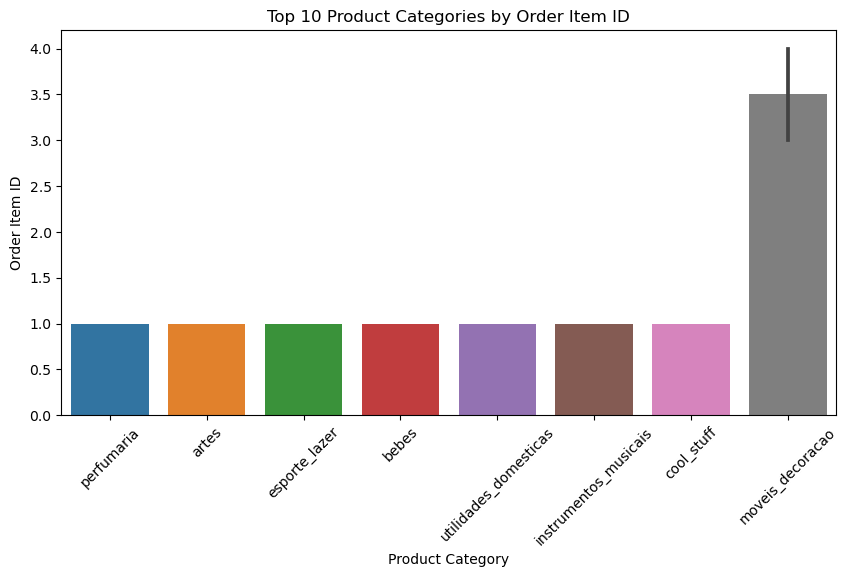

In [44]:
# Limit data menjadi 10
top_10_data = merged_product_id.head(10)

# Membuat bar chart
fig = plt.figure(figsize=(10, 5))
sns.barplot(x="product_category_name", y="order_item_id", data=top_10_data)
plt.xticks(rotation=45) 
plt.xlabel("Product Category")
plt.ylabel("Order Item ID")
plt.title("Top 10 Product Categories by Order Item ID")
plt.show()

## 2. Mencari Distribusi Penjualan Dari order_id

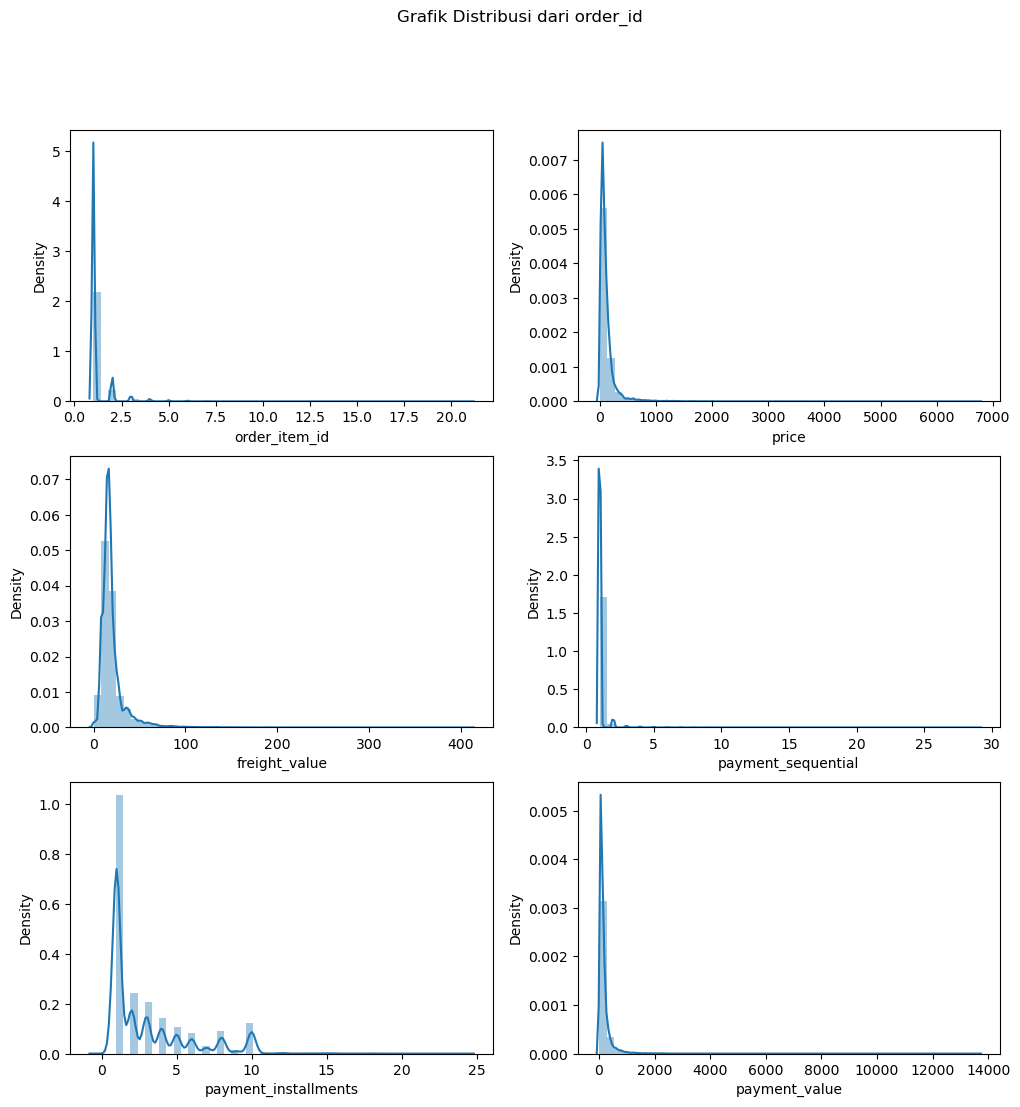

In [38]:
# Membuat grafik kriteria penjualan dari tiap kategori
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3,2, figsize=(12,12))
plt.suptitle('Grafik Distribusi dari order_id')

for i, num in enumerate(numerical_cols_order_id) :
    sns.distplot(merged_order_id[num], ax=axs[i//2, i%2])
    
plt.show()

## 3. ANALISIS KORELASI PADA PRODUCT_ID dan SELLER_ID

### Categorical product_id

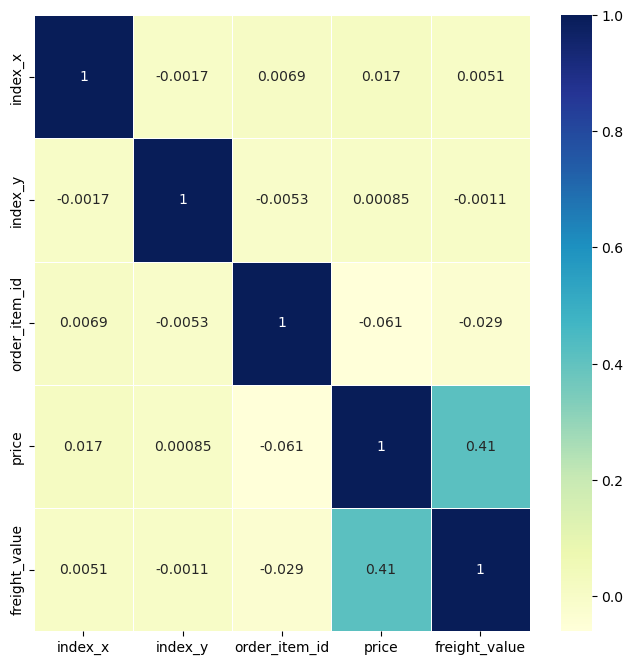

In [45]:
import warnings
warnings.filterwarnings('ignore')

plt.subplots(figsize=(8, 8))
sns.heatmap(merged_product_id.corr(), cmap="YlGnBu",annot=True, linewidths=0.5)
plt.show()

### Categorical seller_id

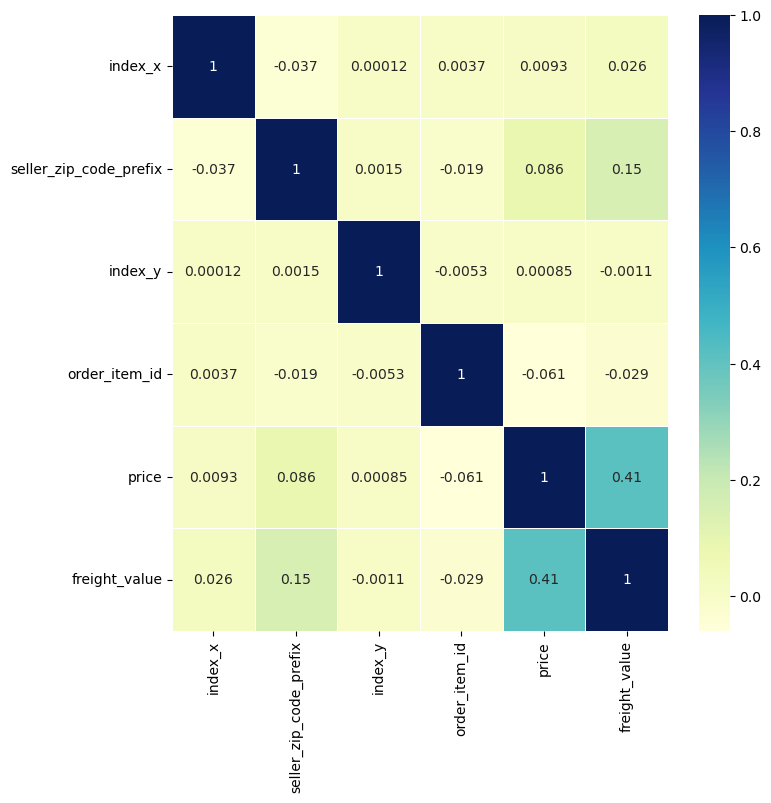

In [46]:
plt.subplots(figsize=(8, 8))
sns.heatmap(merged_seller_id.corr(), cmap="YlGnBu",annot=True, linewidths=0.5)
plt.show()